In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [3]:
# for visualization of molecules including atom numbers
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [5]:
def add_bond_between_substructures(mol_1, mol_2, begin_atom_idx,
                                   end_atom_idx, bond_type):
    """
    Given two rdkit mol objects, begin and end atom indices of the new bond, the bond type, returns a new mol object
    that has the corresponding bond added. Note that the atom indices are based on the combined mol object, see below
    MUST PERFORM VALENCY CHECK AFTERWARDS
    :param mol_1:
    :param mol_2:
    :param begin_atom_idx:
    :param end_atom_idx:
    :param bond_type:
    :return: rdkit mol object
    """
    combined = Chem.CombineMols(mol_1, mol_2)
    rw_combined = Chem.RWMol(combined)
    
    # check that we have an atom index from each substructure
    grouped_atom_indices_combined = Chem.GetMolFrags(rw_combined)
    substructure_1_indices, substructure_2_indices = grouped_atom_indices_combined
    if begin_atom_idx in substructure_1_indices:
        if not end_atom_idx in substructure_2_indices:
            raise ValueError('Invalid atom indices')
    elif end_atom_idx in substructure_1_indices:
        if not begin_atom_idx in substructure_2_indices:
            raise ValueError('Invalid atom indices')
    else:
        raise ValueError('Invalid atom indices')
        
    rw_combined.AddBond(begin_atom_idx, end_atom_idx, bond_type)

    return rw_combined.GetMol()

In [193]:
mol_1 = Chem.MolFromSmiles('CNCC(C)CC(C)(CC1CC1(C)O)C(C)(C)P')#('CCCc1ccccc1')
print(Descriptors.MolLogP(mol_1))
Chem.SanitizeMol(mol_1,sanitizeOps=Chem.SanitizeFlags.SANITIZE_PROPERTIES)
mol_2 = Chem.MolFromSmiles('OC=O')

3.0530000000000026


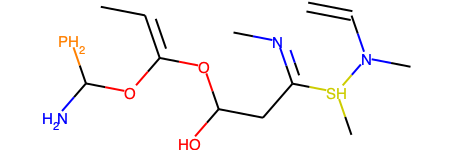

In [192]:
mol_1
#mol_with_atom_index(mol_1)

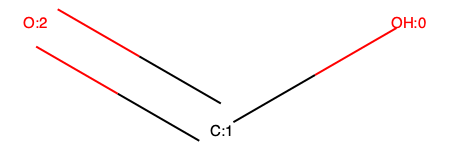

In [8]:
# mol 2
mol_with_atom_index(mol_2)

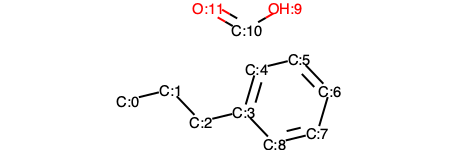

In [9]:
# note that only mol_1 keeps its original atom numbers in the combined mol object. 
# mol_2 has its atom numbers reindexed by: old atom number + mol_1.GetNumAtoms()
combined = Chem.CombineMols(mol_1, mol_2)
mol_with_atom_index(combined)

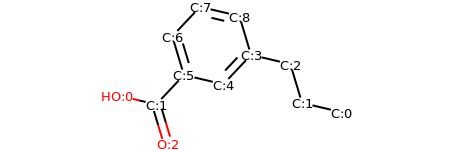

In [66]:
# example of successful bond addition
begin_atom_idx = 5
end_atom_idx = 10
bond_type = Chem.rdchem.BondType.SINGLE
m = add_bond_between_substructures(mol_1, mol_2, begin_atom_idx, end_atom_idx, bond_type)
Chem.SanitizeMol(m,sanitizeOps=Chem.SanitizeFlags.SANITIZE_PROPERTIES)  # check valency
m

In [12]:
# importance of performing valency checks afterwards. This molecule is invalid due to 6 bonds at C1
begin_atom_idx = 1
end_atom_idx = 10
bond_type = Chem.rdchem.BondType.TRIPLE
m = add_bond_between_substructures(mol_1, mol_2, begin_atom_idx, end_atom_idx, bond_type)
Chem.SanitizeMol(m,sanitizeOps=Chem.SanitizeFlags.SANITIZE_PROPERTIES)
m

RDKit ERROR: [14:53:13] Explicit valence for atom # 1 C, 5, is greater than permitted


ValueError: Sanitization error: Explicit valence for atom # 1 C, 5, is greater than permitted